In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import cluster
from sklearn.cluster import KMeans

In [2]:
# read-in the excel spreadsheet using pandas 
df = pd.read_csv(r'credit_card_data_5f.csv')
# print(df.head())

#create model
model = KMeans(n_clusters = 4).fit(df)
df['Cluster'] = model.labels_
# print(df.sample(10))


     外送平台   影音娛樂  網路購物  行動支付   超商  Cluster
91   1.00   1.17  1.00  1.00  0.0        3
116  6.00   1.00  5.29  1.91  6.0        0
46   1.00   1.00  1.00  1.09  0.0        3
74   0.60   1.35  0.80  2.49  2.0        3
9    1.00   1.00  1.00  1.00  0.0        3
21   6.50   2.58  5.64  3.23  6.5        0
32   3.00  11.33  2.43  2.27  3.0        0
75   1.23   2.99  1.34  3.01  2.0        3
30   3.80   0.80  2.51  2.55  0.0        3
105  0.50   0.08  0.50  0.50  0.0        3


C:\Users\Tibame_T14\anaconda3\envs\Credit_cards\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
pd.DataFrame(df).to_csv(r"kmeans_4c_5f.csv", index=0, encoding = 'utf-8-sig')

C:\Users\Tibame_T14\anaconda3\envs\Credit_cards\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tibame_T14\anaconda3\envs\Credit_cards\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tibame_T14\anaconda3\envs\Credit_cards\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tibame_T14\anaconda3\envs\Credit_cards\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

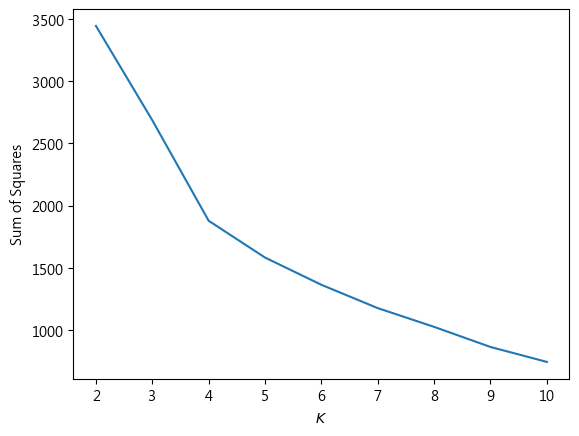

In [12]:
# elbow method
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
def PlotElbow(df):
    sse = []
    krange = list(range(2,11))
    X = df[['外送平台','影音娛樂','網路購物','行動支付','超商']].values
    for n in krange:
        model = cluster.KMeans(n_clusters=n, random_state=3)
        model.fit_predict(X)
        cluster_assignments = model.labels_
        centers = model.cluster_centers_
        sse.append(np.sum((X - centers[cluster_assignments]) ** 2))
        #sse.append(model.inertia_)

    plt.plot(krange, sse)
    plt.xlabel("$K$")
    plt.ylabel("Sum of Squares")
    plt.savefig('elbow.png')
    plt.show()

PlotElbow(df)


# checkout two-dimension diagram with for loop
def PlotCluster(cluster_df, column_names):
    for i in column_names[0:len(column_names)-1]:
        for j in column_names[(column_names.index(i)+1):len(column_names)]:
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 0][i], 
                cluster_df.loc[cluster_df['Cluster'] == 0][j],
                c='red')
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 1][i], 
                cluster_df.loc[cluster_df['Cluster'] == 1][j],
                c='blue')
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 2][i], 
                cluster_df.loc[cluster_df['Cluster'] == 2][j],
                c='orange')
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 3][i], 
                cluster_df.loc[cluster_df['Cluster'] == 3][j],
                c='green')
            plt.title(i +'vs.'+ j +'Clusters')
            plt.xlabel(i)
            plt.ylabel(j)
            plt.grid()
            plt.savefig(f'{i}vs.{j}plot.png')
            plt.show()

column_names = ['外送平台','影音娛樂','網路購物','行動支付','超商']
PlotCluster(df, column_names=column_names)
